In [1]:
import os  # nopep8
import sys  # nopep8
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

In [2]:
from datasets import R2S100k

In [ ]:
r2s_train = R2S100k(image_base='/home/phd_li/dataset/r2s100k/train',
                        seg_base='/home/phd_li/dataset/r2s100k/Train-Labels', 
                        image_transform=None, 
                        mask_transform=None)
r2s_train = R2S100k(image_base='/home/phd_li/dataset/r2s100k/train',
                        seg_base='/home/phd_li/dataset/r2s100k/Train-Labels', 
                        image_transform=None, 
                        mask_transform=None)

In [4]:
image, mask = r2s_dataset[1000]
print(image.shape)
print(mask.shape)

torch.Size([3, 1080, 1920])
torch.Size([1080, 1920])


In [5]:
import cv2
import numpy as np

def image_overlay(image, segmented_image):
    """
    This function will apply an overlay of the output segmentation
    map on top of the orifinal input image. MAINLY TO BE USED WHEN
    EXECUTING `test.py` or `test_vid.py`.
    """
    alpha = 0.6 # how much transparency to apply
    beta = 1 - alpha # alpha + beta should equal 1
    gamma = 0 # scalar added to each sum
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
    cv2.addWeighted(segmented_image, alpha, image, beta, gamma, image)
    return image

(1080, 1920, 3)


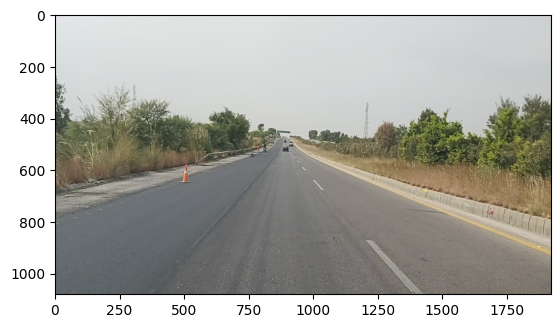

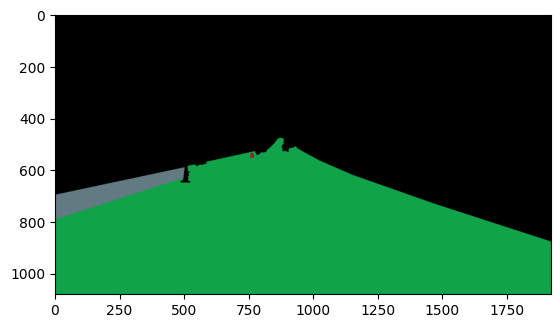

In [8]:
import matplotlib.pyplot as plt

image_rgb = image.permute(1, 2, 0).numpy().astype('uint8')
color_mask = r2s_dataset.label_mask_to_color_mask(mask)
print(color_mask.shape)
plt.figure()
plt.imshow(image_rgb)
plt.figure()
plt.imshow(color_mask)

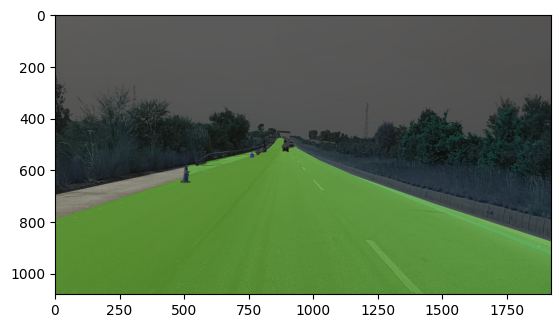

In [9]:
plt.imshow(image_overlay(image_rgb, color_mask))